# A Data Analysis Approach to Investigate the Titanic Passengers 

This electronic document presents a statistical analysis of a sample of passengers of the Titanic. The data was acquired from the [Kaggle website](https://www.kaggle.com/c/titanic) and it corresponds to a sample of 891 passengers of the 2,222 passengers and crew. The purpose of the analysis is to apply the data analysis process to answer questions about the data. In particular it is of special interest to investigate which variable could serve explain why some passengers were able to survive and others not.

The document is organized in 5 sections according to the data analysis process.

- Section 1: presents a set of questions relevant to the researcher.
- Section 2: presents the data wrangling process, that covers the data aquistion and data cleaning process. 
- Section 3: presents a detailed exploratory analysis of the main variables in the data set. 
- Section 4: analyzes the questions formulated in section 1 applying descriptive and inferential statistics. 
- Section 5: summarises the main conclusions supported by the data analysis.  

## 1. Questions

The following questions regarding the Titanic Dataset were formulated considering the data analysis process. This means that such questions were formulated considering the information available. 

The focus of the questions is to try to explain the factors to increase the chances to survive.

- Does sex played a role in increasing the passengers chance to survive?
- Does age improved the chance to survive?
- Does income and chance to survive are related?
- Does having family members inceased the chance to survive?

## 2. Data Wrangling

The following libraries were imported to conduct the analysis

In [62]:
# Imported libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The titanic dataset is imported into a DataFrame using Pandas library. Because the file is a csv file, the read_csv() function was used to parse the data.

In [63]:
# Reading data with Pandas into a DataFrame
titanicData = pd.read_csv('titanic-data.csv')

With the purpose to know if the titanic data was imported correctly, the columns' name and data types were printed. The dataset contains variables such passenger survived status, sex, age, number of family memebers, ticket fare, cabin and port of embarkment.

In [64]:
titanicData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Also the first and last five rows of the DataFrame were printed to analyze the information stored in the dataset.

In [65]:
# Displaying the first ten rows of the of the DataFrame
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
#Displaying the last ten rows of the of the DataFrame
titanicData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


After printing the first and last five rows of the titanic dataset, two issues have been identified in the age and cabin columns. 

- Age: shows NaNs
- Cabin: shows NaNs and we have to separate the Block letter

The following functions were written to clean the data for future analysis.

- The cabin block was extracted from the cabin column.
- Age groups were built using the information in the age column.



In [67]:
# Function to get the cabin block letter
def getCabinBlockLetter(cabinRoomNumber):
    for cabinLetter in cabinRoomNumber:
        firstLetter = cabinLetter[0]
        return firstLetter

In [68]:
# Function for classifying ages (children, adult, senior and unclassified)
def getAgeGroup(age):
    if age < 18:
        return 'children'
    elif age >= 18 and age <60:
        return 'adult'
    elif age >= 60:
        return 'senior'
    else:
        return 'unclassified'

In [69]:
# Function to create categorical travelling class
def getStringClass(pclass):
    if pclass == 1:
        return 'First'
    elif pclass == 2:
        return 'Second'
    elif pclass == 3:
        return 'Third'

The columns containing the cleaned data using the functions above were added to the data frame. Also, to verify that the new columns were correctly added to the DataFrame, the first five rows were printed again.

In [70]:
# Adding extra columns
titanicData['Block'] = titanicData.Cabin.astype('str').apply(getCabinBlockLetter)
titanicData['AgeGroup'] = titanicData.Age.apply(getAgeGroup)
titanicData['CategoryPClass'] = titanicData.Pclass.apply(getStringClass)
titanicData['FamilySize'] = titanicData['SibSp'] + titanicData['Parch']

In [71]:
# A view of the extended version of the DataFrame
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Block,AgeGroup,CategoryPClass,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,adult,Third,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,adult,First,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,adult,Third,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,adult,First,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,adult,Third,0


The following functions were created to draw custom graphs, allowing to reduce the lines of code written. Some of the customizations added are title and labels, among many others.

In [72]:
# Custom histogram.
def plotHistogram(dataSeries, binNumber, mainTitle, xlabel):
    plt.hist(dataSeries, binNumber)
    plt.title(mainTitle)
    plt.ylabel('Count')
    plt.xlabel(xlabel)
    plt.show()

In [73]:
# Custom boxplot
def boxPlot(dataSeries, mainTitle):
    sns.boxplot(dataSeries)
    plt.title(mainTitle)
    plt.show()

In [74]:
# Custom counting bar plot
def countPlot(series,mainTitle,xlabel):
    sns.countplot(x=series, data=titanicData)
    plt.title(mainTitle)
    plt.ylabel('Count')
    plt.xlabel(xlabel)
    plt.show()

In [75]:
# Custom stacked bar plot
def plotStackedBarPlot(xvar,yvarBottom,yvarTop,mainTitle,xlabel,ylabel):
    ind = np.arange(len(xvar))
    xticks(ind + 0.4,xvar)
    plt.bar(ind,yvarBottom, color= '#313F68', label='suvivors')
    plt.bar(ind,yvarTop,color='#B8B8C8',bottom=yvarBottom, label = 'dead')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(mainTitle)
    plt.legend(frameon=True)
    plt.show()

## 3. Data Exploration

This section presents a descriptive analysis of the main variables in the titanic dataset. The analysis is organized by variable. 

The variables analyzed were:
- Age
- Fare
- Sibplings/Spouses
- Parents/Children
- Embarked
- Cabin
- Class

### 3.1. Variable Age

The number of titanic passengers in this sample is 891. In this sample of the titanic's passengers there were 575 adults accounting to the largest group (64.5%), followed by 113 children (12.6%) and 26 seniors (2.9%). It is worth to mention that 177 passengers (19.8%) were not classified because they do not report and age.

The description for each group are the following:
- children < 18
- 18 <= adult < 60
- senior > 60
- unclassified = NaN

In [76]:
# Creates a pandas series that groups the number of passengers by age group (adult, children, senior, unclassified).
countPassengersByGroupAge = titanicData.groupby('AgeGroup').AgeGroup.count()
print countPassengersByGroupAge

AgeGroup
adult           575
children        113
senior           26
unclassified    177
Name: AgeGroup, dtype: int64


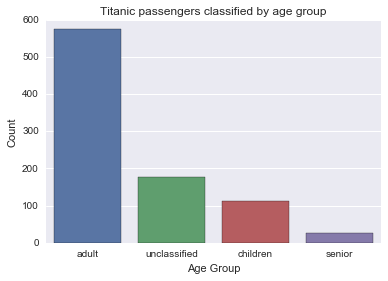

In [77]:
countPlot('AgeGroup','Titanic passengers classified by age group','Age Group')

In [78]:
# Creates a new series with the relative number of passengers by age group.
totalPassengersByGroupAge = titanicData.AgeGroup.count()
relativeCountPassengersByGroupAge = countPassengersByGroupAge / totalPassengersByGroupAge
print relativeCountPassengersByGroupAge

AgeGroup
adult           0.645342
children        0.126824
senior          0.029181
unclassified    0.198653
Name: AgeGroup, dtype: float64


The average age of the titanic passenger in this sample was 29 years. Also it can be seen in the following histogram that the age distribution approximates a normal distribution.

In [79]:
# Calculates the average age of the passengers
titanicData.Age.mean()

29.69911764705882

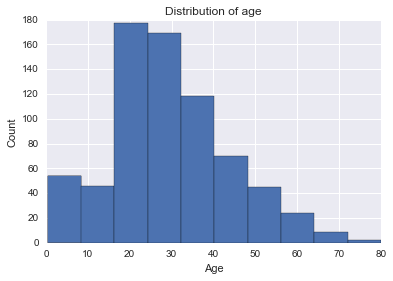

In [80]:

plotHistogram(titanicData.Age.dropna(),10,'Distribution of age','Age')


However, there are differences considering the sex. Females reported and age of 27 and males reported an age of 30. The following boxplot supports the latter. Also it shows that the 50% of the population considring those between the 25 and 75 percentile is greater in men and in women. Furthermore, the male group reports a few outliers (males older than 65 years old). In fact the oldest male is 80 years old.

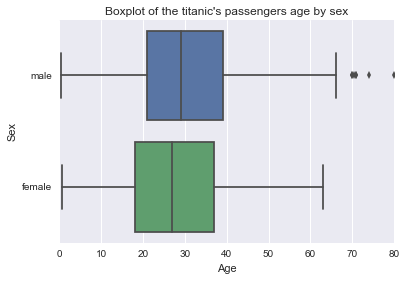

In [81]:
# Plots a boxplot of the age by sex group
sns.boxplot(titanicData.Age.dropna(),titanicData.Sex)
plt.title('Boxplot of the titanic\'s passengers age by sex')
plt.show()

### 3.2. Sex

In the titanic passenger sample there were 453 males and 261 females.

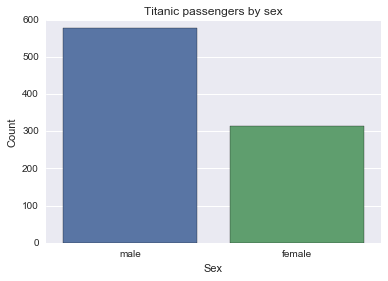

In [82]:
countPlot('Sex','Titanic passengers by sex','Sex')

In [83]:
# Prints descriptive statistics by sex
titanicData.groupby('Sex').Age.describe()

Sex          
female  count    261.000000
        mean      27.915709
        std       14.110146
        min        0.750000
        25%       18.000000
        50%       27.000000
        75%       37.000000
        max       63.000000
male    count    453.000000
        mean      30.726645
        std       14.678201
        min        0.420000
        25%       21.000000
        50%       29.000000
        75%       39.000000
        max       80.000000
Name: Age, dtype: float64

### 3.3. Variable Fare

Assuming that the ticket fare is in American dollars, the average fare of the titanic was 32.2 dollars. However, the average fare is overestimated considering that there are outliers in the sample. For instance, 25% of the passengers paid less than 7.9 dollars and 75% of the passengers paid less than 31 dollars. A better measure of central tendency in the price will be 14.4 dollars that are equal to the median of the sample. The following fare distribution and fare boxplot support this explanation. It can be seen that there were few people in the sample that paid above 31 dollars.

In [84]:
# Descriptive statistics of the fare
titanicData.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Populating the interactive namespace from numpy and matplotlib


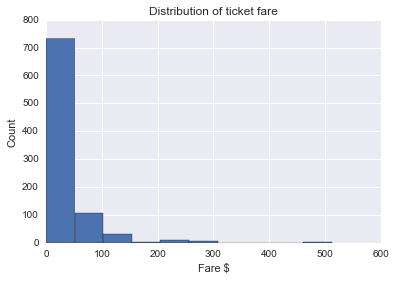

In [85]:
# Distribution of the titanic's fare
%pylab inline
plotHistogram(titanicData.Fare,10,'Distribution of ticket fare','Fare $')

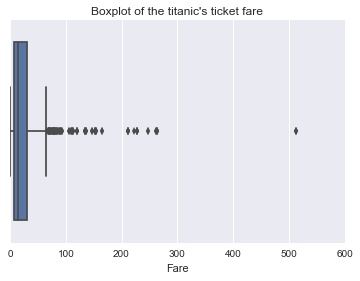

In [86]:
# Boxplot of the titanic's fare
boxPlot(titanicData.Fare,'Boxplot of the titanic\'s ticket fare')

In the sample there were 216 passengers travelling in first class, 184 in second class and 491 in third class. The following graph shows the boxplots of the fare by passenger class (first, second and third). From the graph it can be concluded that 50% of the tickets in: 
- first class tickets were bought between 30.9 and 93.5 dollars,
- second class tickets were bought between 13 and 26 dollars,
- third class tickets were bought between 7.75 and 15.5 dollars

Also it can be seen that the information is not completly accurate as there are fares equal to zero  and outliers in the three groups.

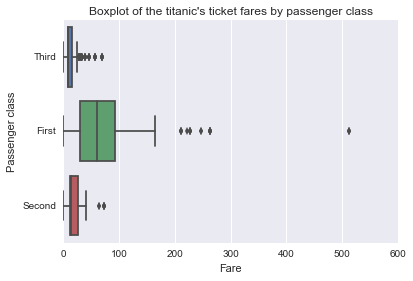

In [87]:
titanicData.Pclass.apply(str)
sns.boxplot(titanicData.Fare,titanicData.CategoryPClass)
plt.title('Boxplot of the titanic\'s ticket fares by passenger class')
plt.ylabel('Passenger class')
plt.show()

In [88]:
titanicData.groupby('Pclass').Fare.describe()

Pclass       
1       count    216.000000
        mean      84.154687
        std       78.380373
        min        0.000000
        25%       30.923950
        50%       60.287500
        75%       93.500000
        max      512.329200
2       count    184.000000
        mean      20.662183
        std       13.417399
        min        0.000000
        25%       13.000000
        50%       14.250000
        75%       26.000000
        max       73.500000
3       count    491.000000
        mean      13.675550
        std       11.778142
        min        0.000000
        25%        7.750000
        50%        8.050000
        75%       15.500000
        max       69.550000
Name: Fare, dtype: float64

Titanic fares varied among port of embarkment (values of the median): 
- Cherbourg (C): 29.7 
- Queenstown (Q): 7.75
- South Hampton (S): 27.1

Bearing this in mind and using the boxplots, it can be concluded that Passengers boarding at Cherbourg paid the highest prices, then those in South Hampton.

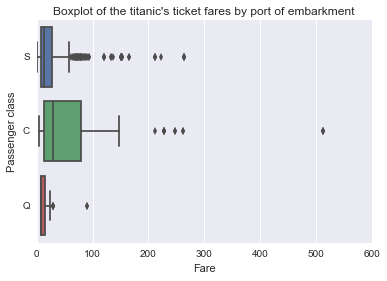

In [89]:
# Boxplots of fare by port of embarkment
sns.boxplot(titanicData.Fare,titanicData.Embarked)
plt.title('Boxplot of the titanic\'s ticket fares by port of embarkment')
plt.ylabel('Passenger class')
plt.show()

In [90]:
# Descriptive statistics of the fare variable by port of embarkment
titanicData.groupby('Embarked').Fare.describe()

Embarked       
C         count    168.000000
          mean      59.954144
          std       83.912994
          min        4.012500
          25%       13.697950
          50%       29.700000
          75%       78.500025
          max      512.329200
Q         count     77.000000
          mean      13.276030
          std       14.188047
          min        6.750000
          25%        7.750000
          50%        7.750000
          75%       15.500000
          max       90.000000
S         count    644.000000
          mean      27.079812
          std       35.887993
          min        0.000000
          25%        8.050000
          50%       13.000000
          75%       27.900000
          max      263.000000
Name: Fare, dtype: float64

### 3.4. Variable siblings/spouses

Most of the titanic's passengers in the sample were travelling without siblings/spouses. From the 891 passengers, 608 passenger did not have a sibling/spuse, and only 209 had one sibling/spouse.

In [91]:
titanicData.groupby('SibSp').SibSp.count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

Populating the interactive namespace from numpy and matplotlib


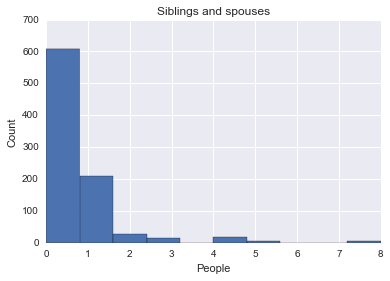

In [92]:
%pylab inline
plotHistogram(titanicData.SibSp,10,'Siblings and spouses','People')

### 3.5. Variable parents/children

Furthermore, most of the passengers in the titanic sample were travelling without parents/children. 678 passengers reported zero parents children, while 118 and 80 passengers reported to have one and two parents/children respectively.

In [93]:
titanicData.groupby('Parch').Parch.count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

Populating the interactive namespace from numpy and matplotlib


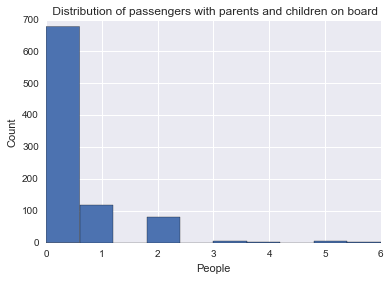

In [94]:
%pylab inline
plotHistogram(titanicData.Parch,10,' Distribution of passengers with parents and children on board','People')

### 3.6. Variable Embarked

Most of the people embarked in the port of South Hampton, 644 passengers. In the Port of Cherbourg and Queenstown 168 and 77 passengers embarked respectively.

In [95]:
# Shows the number of passengers by port of embarkment
titanicData.groupby('Embarked').Embarked.count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

### 3.7. Variables Cabin and Pclass

The following table shows the information of cabin block and class where the 891 passengers were travelling.

- In the sample 491 passengers were travelling third class (55%), 216 passengers in first class (24%) and 184 passenger in second class (21%).

- There is not enough information to assess in which block most of the passengers were travelling as there are 687 passengers (77%) in the sample that did not report that information.

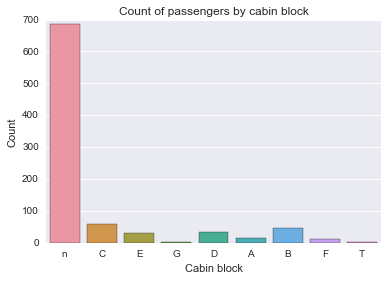

In [96]:
countPlot("Block",'Count of passengers by cabin block','Cabin block')

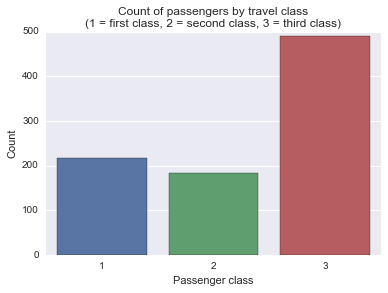

In [97]:
countPlot("Pclass",'Count of passengers by travel class\n(1 = first class, 2 = second class, 3 = third class)','Passenger class')

In [98]:
# Prints a table showing the counts by cabin block and passenger class.
pd.crosstab(index=titanicData.Pclass, columns=titanicData.Block,margins=True)

Block,A,B,C,D,E,F,G,T,n,All
Pclass,,,,,,,,,,
1,15,47,59,29,25,0,0,1,40,216
2,0,0,0,4,4,8,0,0,168,184
3,0,0,0,0,3,5,4,0,479,491
All,15,47,59,33,32,13,4,1,687,891


In [99]:
# Prints a relative table showing the counts by cabin block and passenger class to the total number of passengers..
pd.crosstab(index=titanicData.Pclass, columns=titanicData.Block,margins=True) / 891

Block,A,B,C,D,E,F,G,T,n,All
Pclass,,,,,,,,,,
1,0.016835,0.05275,0.066218,0.032548,0.028058,0.000000,0.000000,0.001122,0.044893,0.242424
2,0.000000,0.00000,0.000000,0.004489,0.004489,0.008979,0.000000,0.000000,0.188552,0.206510
3,0.000000,0.00000,0.000000,0.000000,0.003367,0.005612,0.004489,0.000000,0.537598,0.551066
All,0.016835,0.05275,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,1.000000


### 3.8. Survival

In the 891 sample of passengers only 342 surived (38%) and 549 died (62%).

In [100]:
titanicData.groupby('Survived').Survived.count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [101]:
survivalTable = titanicData.groupby('Survived').Survived.count()
relativeSurivalTable = survivalTable / 891
print relativeSurivalTable

Survived
0    0.616162
1    0.383838
Name: Survived, dtype: float64


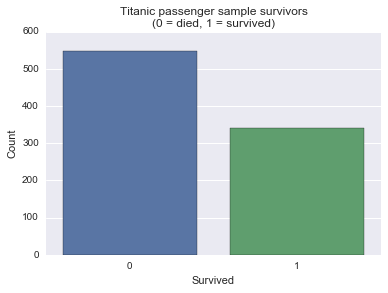

In [102]:
countPlot("Survived",'Titanic passenger sample survivors\n(0 = died, 1 = survived)','Survived')

## 4. Analysis

This section analyzes the data already explored in the last section to identify which were the main factors of survival in the titanic. In this sense, the following explanatory variables will be analyzed.
- Sex
- Age
- Income/Class
- Pclass/Cabin Block

### 4.1. Survived and sex

From the sample of passengers in the titanic a contingency table was calculated between the result of survival and sex. The table below shows that, 81 female and 468 male died and 233 female and 109 male survived. From this sample it can be assumed that there is a positive relationship between surviving and being women. However, a statistical test is required to verify this assumption is significant. 

In [103]:
print pd.crosstab(index=titanicData.Survived, columns=titanicData.Sex, margins = True)
tableSurvivalSex = pd.crosstab(columns=titanicData.Survived,index=titanicData.Sex)

Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891


A Chi Square statistical test was conducted to assess wether there is a significant relationship between survival and sex. 
- Null hypothesis ($H_{0}$): Survival and sex are independent variables.
- Alternative hypothesis ($H_{1}$): Survival and sex are not independent variables.
- Level of significance: $\alpha = 5\%$

In [104]:
# Chi square statistical test to test independency between survival and sex.
stats.chi2_contingency(tableSurvivalSex)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 193.47474747,  120.52525253],
        [ 355.52525253,  221.47474747]]))

The results of the statistical test show that there is a positive association between the number of people that survived and being women $\left (\chi^{2} = 260.71, d.f.=1, p < 0.001 \right )$

### 4.2. Survived and age

When the titanic began to sink, there were not enough rescue boats for all passengers in the titanic. According to history women and children had priority to board rescue boats. The following contingency table between the variables surived and age group show the following. From the total number of adults more than a half died; from the total number of children more than a half survived; and most of the seniors died; and from those that it was not possible to clasify, most of them died.

In [105]:
# Creates a relative table of survival vs age group.
print pd.crosstab(index=titanicData.Survived, columns=titanicData.AgeGroup,margins=True)
tableSurvivalAge = pd.crosstab(columns=titanicData.Survived, index=titanicData.AgeGroup)

AgeGroup  adult  children  senior  unclassified  All
Survived                                            
0           353        52      19           125  549
1           222        61       7            52  342
All         575       113      26           177  891


Similarly a Chi Square statistical test was conducted to assess whether there is a significant relationship between survival and age. Age group has used as way to segment the age numerical variable.
- Null hypothesis ($H_{0}$): Survival and age group are independent variables.
- Alternative hypothesis ($H_{A}$): Survival and age group are not independent variables.
- Level of significance: $\alpha = 5\%$

In [106]:
# Chi square statistical test to test independency between survival and age group.
stats.chi2_contingency(tableSurvivalAge)

(19.150562716956362,
 0.00025448373780605096,
 3,
 array([[ 354.29292929,  220.70707071],
        [  69.62626263,   43.37373737],
        [  16.02020202,    9.97979798],
        [ 109.06060606,   67.93939394]]))

The results of the statistical test show that there is a positive association between being younger and suriving.(X^2 = 19.15, d.f.=1, p < 0.001)

### 4.3 Survived and income

The following contingency table between survival and passenger class reveals that more than half of the passengers travelling in first class survived; almost a half of the passengers in second class survived; and almost one fourth of the passengers in third class surived. It could be inferred that there is a relationship between these two variables.

In [107]:
# Creates a relative table of survival to passenger class
tableSurvivalPClass = pd.crosstab(columns=titanicData.Survived, index=titanicData.Pclass)
pd.crosstab(index=titanicData.Survived, columns=titanicData.Pclass,margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


A Chi Square test was conducted to test independency.

- Null hypothesis ($H_{0}$): Survival and passenger class are independent variables.
- Alternative hypothesis ($H_{1}$): Survival and passenger class are not independent variables.
- Level of significance: $\alpha = 5\%$

In [108]:
# Chi square statistical test to test independency between survival and passenger class.
stats.chi2_contingency(tableSurvivalPClass)

(102.88898875696056,
 4.5492517112987927e-23,
 2,
 array([[ 133.09090909,   82.90909091],
        [ 113.37373737,   70.62626263],
        [ 302.53535354,  188.46464646]]))

The results of the statistical test show that there is a positive association between income and chances to survive $\left (\chi^{2} = 102.88, d.f.=2, p < 0.001 \right )$

Also the Spearman Rank correlation coefficient ($\rho$) was calculated to test for non-correlation. where $\rho$ is negatively correlates if equal to -1 and positively correlated if equal to 1.

In [109]:
# Conducts a Spearman Rank Correlation Test to test if there is a relationship between the two variables.
stats.spearmanr(titanicData.Survived,titanicData.Fare)

SpearmanrResult(correlation=0.32373613944480834, pvalue=3.4712279702070052e-23)

The Spearman Rank Correlation coefficient shows $\rho$ = 0.32, meaning that the two variables are positively correlated. In this sense, considering ticket fare as a proxy of income, the test confirms that those with higher incomes had more chances to surive.

### 4.4 Survived and having siblings/spouses on board

The following contingency table between survival and having siblings/spouse suggests that having family members inceased the chances to survive.

In [110]:
# Creates a contingency table of survival to siblings/spouse
tableSurvivedSibSp = pd.crosstab(columns=titanicData.Survived, index=titanicData.SibSp)
pd.crosstab(index=titanicData.Survived, columns=titanicData.SibSp,margins=True)

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


A Chi Square test was conducted to test independency.

- Null hypothesis ($H_{0}$): Survival and siblings/spouse are independent variables.
- Alternative hypothesis ($H_{1}$): Survival and siblings/spouse are not independent variables.
- Level of significance: $\alpha = 5\%$

In [111]:
# Chi square statistical test to test independency between survival and siblings/spouse.
stats.chi2_contingency(tableSurvivedSibSp)

(37.271792915204301,
 1.5585810465902147e-06,
 6,
 array([[ 374.62626263,  233.37373737],
        [ 128.77777778,   80.22222222],
        [  17.25252525,   10.74747475],
        [   9.85858586,    6.14141414],
        [  11.09090909,    6.90909091],
        [   3.08080808,    1.91919192],
        [   4.31313131,    2.68686869]]))

The results of the statistical test show that there is a positive association between having siblings/spouse and chances to survive $\left (\chi^{2} = 37.27, d.f.=6, p < 0.001 \right )$

The Spearman Rank correlation coefficient ($\rho$) was calculated to test for non-correlation.

In [112]:
# Conducts a Spearman Rank Correlation Test to test if there is a relationship between the two variables.
stats.spearmanr(titanicData.Survived,titanicData.SibSp)

SpearmanrResult(correlation=0.088879484680905008, pvalue=0.0079414312857335329)

The Spearman Rank Correlation coefficient shows that $\rho$ = 0.09. This suggests that there is a positive association between survival and siblings/parents. In this sense, the evidence suggests that having siblings/spouses increased your chances of survival.

### 4.5 Survived and having children/parents on board

The following contingency table between survival and having parents/children on board suggests that having family members inceased the chances to survive.

In [113]:
# Creates a contingency table of survival to parents/children
tableSurvivedParch = pd.crosstab(index=titanicData.Survived, columns=titanicData.Parch)
pd.crosstab(index=titanicData.Survived, columns=titanicData.Parch,margins=True)

Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
All,678,118,80,5,4,5,1,891


A Chi Square test was conducted to test independency.

- Null hypothesis ($H_{0}$): Survival and parents/children are independent variables.
- Alternative hypothesis ($H_{1}$): Survival and parents/children are not independent variables.
- Level of significance: $\alpha = 5\%$

In [114]:
# Chi square statistical test to test independency between survival and parents/children.
stats.chi2_contingency(tableSurvivedParch)

(27.925784060236168,
 9.7035264210399973e-05,
 6,
 array([[  4.17757576e+02,   7.27070707e+01,   4.92929293e+01,
           3.08080808e+00,   2.46464646e+00,   3.08080808e+00,
           6.16161616e-01],
        [  2.60242424e+02,   4.52929293e+01,   3.07070707e+01,
           1.91919192e+00,   1.53535354e+00,   1.91919192e+00,
           3.83838384e-01]]))

The results of the statistical test show that there is a positive association between having parents/children on board and chances to survive $\left (\chi^{2} = 27.93, d.f.=6, p < 0.001 \right )$

The Spearman Correlation Coefficient ($\rho$) was calculated also to test non-correlation.

In [115]:
# Conducts a Spearman Rank Correlation Test to test if there is a relationship between the two variables.
stats.spearmanr(titanicData.Survived,titanicData.Parch)

SpearmanrResult(correlation=0.13826563286545587, pvalue=3.453591460380432e-05)

The Spearman Rank Correlation coefficient is $\rho$ = 0.14, therefore, the two variables are positively correlated. In this sense, the evidence suggests that having parents/children increased your chances of survival.

### 4.6 Family size

The following contingency table between survival and family members on board suggests that there are more chances to survive if having another member on board.

The family size was calculated adding together the number of siblings, spouse, parents and children.

In [116]:
# Creates a contingency table of survival to family members
tableFamilySize = pd.crosstab(columns=titanicData.Survived, index=titanicData.FamilySize)
pd.crosstab(columns=titanicData.Survived, index=titanicData.FamilySize,margins=True)

Survived,0,1,All
FamilySize,,,
0,374,163,537
1,72,89,161
2,43,59,102
3,8,21,29
4,12,3,15
5,19,3,22
6,8,4,12
7,6,0,6
10,7,0,7


The Spearman Correlation Coefficient ($\rho$) was calculated also to test non-correlation

In [117]:
stats.spearmanr(titanicData.Survived,titanicData.FamilySize)

SpearmanrResult(correlation=0.16546291168480365, pvalue=6.8227288928357226e-07)

The Spearman Rank Correlation coefficient is $\rho$ = 0.16, therefore, the two variables are positively correlated. In this sense, the evidence suggests that having familiy members onf board increased your chances to survive.

## 5. Conclusions

Considering the questions presented in section one and the statistical analysis presented in the previous section allowed to conclude the following.

There were significant factors that increased the chances to survive to the Titanic disaster. Among those factors were:

- Being women increased the chances to survive (4.1).
- The younger the passenger's age the more likely to survive (4.2).

These results are congruent with the principle that women and children were the priority to have a seat in the rescue boats. Other factors identified:

- Using ticket price as a proxy to income per capita, those passengers that paid more money to travel in the Titanic increased their chances to survive. In this sense people were not treated equally (4.3)
- Passengers with one, two and three family members on board had more chances to survive (4.4, 4.5 & 4.6).

The following graphs summarize the findings of the data analysis.

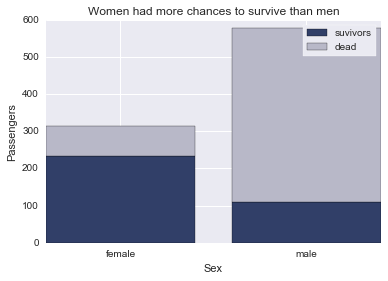

In [118]:
# Stacked bar plot of sex and survived.
survivors = tableSurvivalSex[1]
dead = tableSurvivalSex[0]
xaxis = ['female','male']

plotStackedBarPlot(xaxis, survivors,dead,
                   'Women had more chances to survive than men',
                   'Sex',
                   'Passengers')

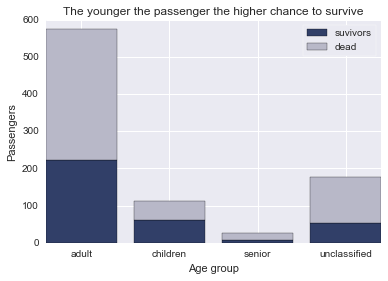

In [119]:
# Stacked bar plot of age and survived.
survivors = tableSurvivalAge[1]
dead = tableSurvivalAge[0]
xaxis = ['adult','children','senior','unclassified']

plotStackedBarPlot(xaxis, survivors,dead,
                   'The younger the passenger the higher chance to survive',
                   'Age group',
                   'Passengers')

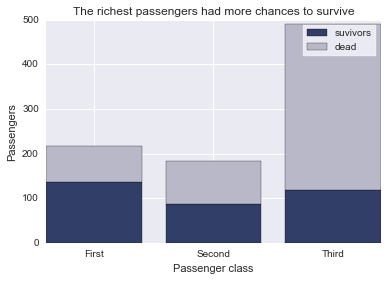

In [120]:
# Stacked bar plot of income and survived.
survivors = tableSurvivalPClass[1]
dead = tableSurvivalPClass[0]
xaxis = ['First','Second','Third']

plotStackedBarPlot(xaxis, survivors,dead,
                   'The richest passengers had more chances to survive',
                   'Passenger class',
                   'Passengers')

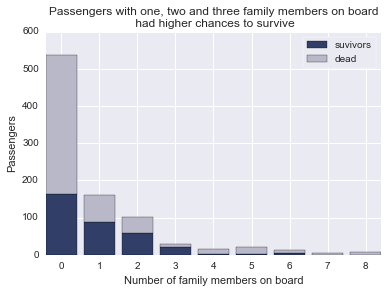

In [121]:
# Stacked bar of family size and survived.
survivors = tableFamilySize[1]
dead = tableFamilySize[0]
xaxis = ['0','1','2','3','4','5','6','7','8']

plotStackedBarPlot(xaxis, survivors,dead,
                   'Passengers with one, two and three family members on board\n had higher chances to survive',
                   'Number of family members on board',
                   'Passengers')